In [ ]:
!python -W ignore precip_bin.py --dir param

P13 | precip 10NS: 4.82 | precip 5NS: 7.21
E13 | precip 10NS: 6.15 | precip 5NS: 9.77
S13 | precip 10NS: 5.90 | precip 5NS: 9.77
SS13 | precip 10NS: 6.03 | precip 5NS: 9.65
P5 | precip 10NS: 5.20 | precip 5NS: 6.73
E5 | precip 10NS: 5.69 | precip 5NS: 7.51


Text(0.59, 0.89, '(b)')

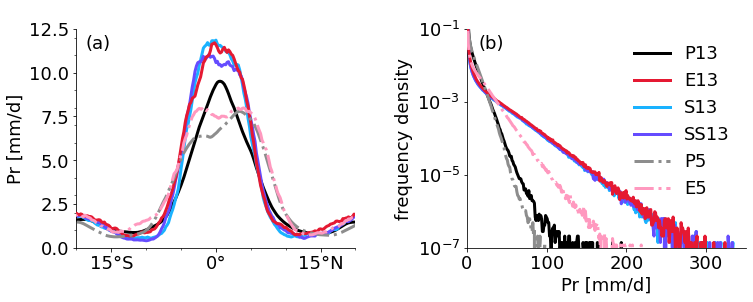

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
from enstools.io import read
from matplotlib.ticker import MultipleLocator
%matplotlib inline

#plt.style.use('dark_background')
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1,2, figsize=(12,4))
plt.subplots_adjust(wspace=0.4, top=0.96,bottom=0.2)

deg = u'\xb0'

opath = '/archive/meteo/w2w-p2/B6/natureruns_new/'
flists = ['param','explicit','shallow','stochastic_shallow','P5','E5']
#colors = ['dimgray','#64CBCF', '#006D6D','#FF9AA1', '#111111', '#9F3B40']
#colors = ['#000000','#295F8A', '#AD71B5', '#E21F26', '#777777', '#AFCBE3'] #srip_reanalysis
colors = ['black','#E51932','#1AB2FF','#654CFF','#8D8D8D','#FF99BF'] #Cat12
ls = list(['solid'])*4 + list(['dashdot'])*2
zo=[0,3,1,2,4,5]

lw = 3#2.5
title=['P13','E13','S13','SS13','P5','E5']

for i, od in enumerate(flists):
    ofiles = glob.glob('data/%s/obs_DOM01_ML_reg_tot_prec_*.nc' % od)
    ofiles = sorted(ofiles)
    
    prec = xr.open_mfdataset([ofiles[0], ofiles[-1]])['tot_prec']
    prec_reg = prec.diff('time')/40.
    
    prec_reg.mean('lon')[0,...].plot.line(ax=axs[0], lw=lw, color=colors[i], label=title[i], ls=ls[i], zorder=zo[i])
    prec_10 = prec_reg.sel(lat=slice(-10,10)).mean().values
    prec_5 = prec_reg.sel(lat=slice(-5,5)).mean().values
    print('%s | precip 10NS: %.2f | precip 5NS: %.2f' % (title[i], prec_10, prec_5))
    
    #distribution
    ds = xr.open_dataset('hist_daily_precip_reg_%s.nc' % od)
    ds.hist.plot.line(ax=axs[1], color=colors[i], lw=lw, label=title[i], ls=ls[i], zorder=zo[i])
    #axs[1].vlines(-1,-2,-3, lw=lw, color=colors[i], label=title[i], ls=ls[i])

axs[1].set_yscale('log')
#axs[1].set_xlim(0,500)
axs[1].set_xlim(0,350)
axs[1].set_ylim(1e-7,0.1)
axs[1].legend(frameon=False)

axs[0].set_xticks([-15,0,15])
axs[0].set_xticklabels(['15%sS' % deg, '0%s' % deg, '15%sN' % deg])
axs[0].xaxis.set_minor_locator(MultipleLocator(5))
axs[0].set_xlim(-20,20)
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    ax.set_xlabel(" ")
    #ax.set_facecolor("#1d305f")

axs[0].set_ylim(0,12.5)

#axs[0].set_yticks([0,5,10])
axs[0].yaxis.set_minor_locator(MultipleLocator(1))
axs[0].set_ylabel(" ")
axs[0].set_title(" ")
axs[0].set_ylabel("Pr [mm/d]")
axs[1].set_ylabel("frequency density")
axs[1].set_xlabel("Pr [mm/d]")
fig.text(0.135, 0.89, '(a)')
fig.text(0.59, 0.89, '(b)')